<a href="https://colab.research.google.com/github/sajiaakhter/mec-mini-projects/blob/master/mec_13_5_1_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance



Data preparation 

In [11]:
filepath= "https://raw.githubusercontent.com/sajiaakhter/mec-mini-projects/master/GermanCredit.csv"
credit_df = pd.read_csv(filepath)
credit_df.head()



,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
x = credit_df.drop('Class', axis = 1)
print(x.head())

y = credit_df['Class']
print(y.head())
#change the label of 'Class' to 0 and 1
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

Split training test set

In [21]:
#Split data using  Stratified k-fold based on class label 
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state=30, stratify =y)

Model


In [29]:
dt_clf = DecisionTreeClassifier()
params = {'max_depth':[2,3,4,5]}
dt_cv =KFold(n_splits = 10, shuffle = True)

dt_clf_gridSearch = GridSearchCV(dt_clf,param_grid = params, cv = dt_cv, verbose = 4)

dt_clf_gridSearch.fit(X_train,Y_train)
print(dt_clf_gridSearch.best_estimator_, dt_clf_gridSearch.best_params_, dt_clf_gridSearch.best_score_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ......................max_depth=2;, score=0.700 total time=   0.0s
[CV 2/10] END ......................max_depth=2;, score=0.743 total time=   0.0s
[CV 3/10] END ......................max_depth=2;, score=0.671 total time=   0.0s
[CV 4/10] END ......................max_depth=2;, score=0.643 total time=   0.0s
[CV 5/10] END ......................max_depth=2;, score=0.771 total time=   0.0s
[CV 6/10] END ......................max_depth=2;, score=0.643 total time=   0.0s
[CV 7/10] END ......................max_depth=2;, score=0.714 total time=   0.0s
[CV 8/10] END ......................max_depth=2;, score=0.757 total time=   0.0s
[CV 9/10] END ......................max_depth=2;, score=0.714 total time=   0.0s
[CV 10/10] END .....................max_depth=2;, score=0.743 total time=   0.0s
[CV 1/10] END ......................max_depth=3;, score=0.771 total time=   0.0s
[CV 2/10] END ......................max_depth=3;

Predict


In [31]:
predict = dt_clf_gridSearch.predict(X_test)
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.54      0.31      0.39        98
           1       0.72      0.87      0.79       202

    accuracy                           0.69       300
   macro avg       0.63      0.59      0.59       300
weighted avg       0.66      0.69      0.66       300



Visualization


In [ ]:
!pip install dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

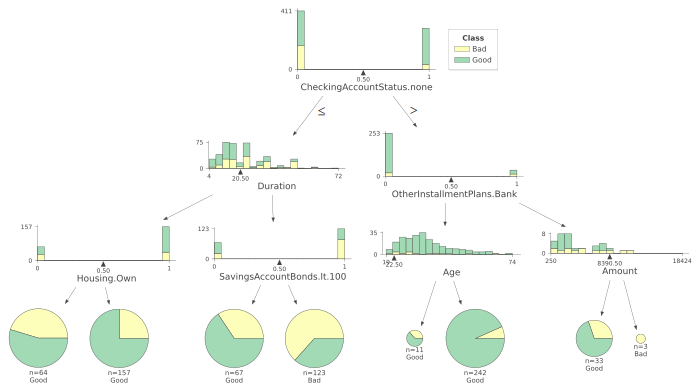

In [36]:
from dtreeviz.trees import dtreeviz
dt_clf2 = DecisionTreeClassifier(max_depth=dt_clf_gridSearch.best_params_['max_depth'])
dt_clf2.fit(X_train, Y_train)
dtreeviz(dt_clf2,X_train,Y_train,target_name='Class', feature_names=X_train.columns,class_names = list(encoder.classes_))


Random Forest


In [46]:
rf_clf = RandomForestClassifier(n_estimators = 200, random_state=3)

rf_clf_grid = GridSearchCV(rf_clf,param_grid = params, cv = dt_cv, verbose = 4)

rf_clf_grid.fit(X_train,Y_train)
print(rf_clf_grid.best_estimator_,rf_clf_grid.best_index_,rf_clf_grid.best_params_,rf_clf_grid.best_score_)

rf_clf2 = RandomForestClassifier(n_estimators = 200, random_state=3, max_depth=rf_clf_grid.best_params_['max_depth'])
rf_clf2.fit(X_train,Y_train)
rf_predict = rf_clf2.predict(X_test)
print(classification_report(Y_test,rf_predict))


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ......................max_depth=2;, score=0.757 total time=   0.8s
[CV 2/10] END ......................max_depth=2;, score=0.643 total time=   0.8s
[CV 3/10] END ......................max_depth=2;, score=0.714 total time=   0.5s
[CV 4/10] END ......................max_depth=2;, score=0.743 total time=   0.5s
[CV 5/10] END ......................max_depth=2;, score=0.814 total time=   0.5s
[CV 6/10] END ......................max_depth=2;, score=0.671 total time=   0.5s
[CV 7/10] END ......................max_depth=2;, score=0.714 total time=   0.5s
[CV 8/10] END ......................max_depth=2;, score=0.629 total time=   0.6s
[CV 9/10] END ......................max_depth=2;, score=0.700 total time=   0.6s
[CV 10/10] END .....................max_depth=2;, score=0.729 total time=   0.3s
[CV 1/10] END ......................max_depth=3;, score=0.786 total time=   0.3s
[CV 2/10] END ......................max_depth=3;

Important Features

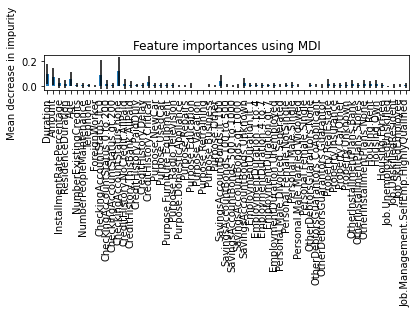

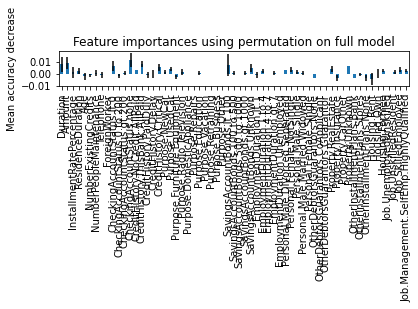

In [63]:
import numpy as np

importances = rf_clf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf2.estimators_], axis=0)

forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

result = permutation_importance(rf_clf2, X_test, Y_test)
forest_importances_perm = pd.Series(result.importances_mean, index=x.columns)

fig, ax = plt.subplots()
forest_importances_perm.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Partial Dependance Plot


In [ ]:
!pip install pdpbox


In [72]:
index = np.argsort(importances)[::-1]
for i in index:
  print(x.columns[i],importances[i])


CheckingAccountStatus.none 0.12013565611715708
Duration 0.09782932976625107
CheckingAccountStatus.lt.0 0.09393031219017006
Amount 0.07835645266718556
Age 0.059039970617612736
SavingsAccountBonds.lt.100 0.039093798689590564
CreditHistory.Critical 0.03405361354124542
InstallmentRatePercentage 0.027526167687439117
SavingsAccountBonds.Unknown 0.02618909732500869
Property.RealEstate 0.021293624842309913
OtherInstallmentPlans.Bank 0.020186721099234996
ResidenceDuration 0.019875274259080873
CreditHistory.NoCredit.AllPaid 0.01939376151871325
OtherInstallmentPlans.None 0.018149981171728044
Housing.Own 0.0178896116473705
CheckingAccountStatus.0.to.200 0.016766353172149338
Housing.Rent 0.01497956342135647
Personal.Male.Single 0.013670137424354268
CreditHistory.ThisBank.AllPaid 0.013329540285675687
Purpose.NewCar 0.009824608347543656
Property.Unknown 0.009630485283139055
NumberExistingCredits 0.009277619276357837
CreditHistory.Delay 0.008966158808612398
Job.Management.SelfEmp.HighlyQualified 0.008

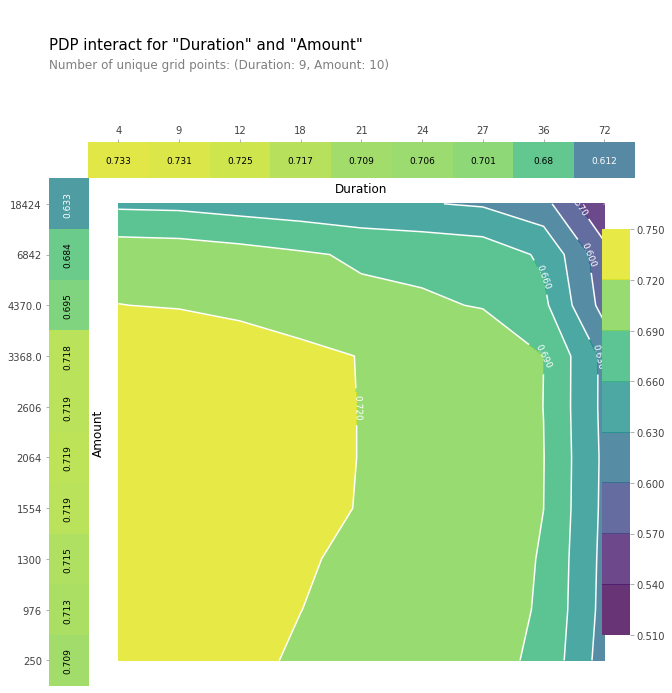

In [75]:
from pdpbox import pdp

pair1 = ['Duration', 'Amount']

pdp_pair1 = pdp.pdp_interact(model=rf_clf2, dataset= credit_df, model_features = x.columns, features = pair1)

fig,axes = pdp.pdp_interact_plot(pdp_interact_out = pdp_pair1, feature_names = pair1, plot_type='contour', x_quantile=True, plot_pdp=True)


xgboost